In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)


## Initialize

Create x, y grid space using a numpy meshgrid along a range at specified intervals

In [2]:
xvalues, yvalues = np.meshgrid(np.arange(-4, 4, 0.05), np.arange(-4, 4, 0.05))

In [3]:
xvalues

array([[-4.  , -3.95, -3.9 , ...,  3.85,  3.9 ,  3.95],
       [-4.  , -3.95, -3.9 , ...,  3.85,  3.9 ,  3.95],
       [-4.  , -3.95, -3.9 , ...,  3.85,  3.9 ,  3.95],
       ...,
       [-4.  , -3.95, -3.9 , ...,  3.85,  3.9 ,  3.95],
       [-4.  , -3.95, -3.9 , ...,  3.85,  3.9 ,  3.95],
       [-4.  , -3.95, -3.9 , ...,  3.85,  3.9 ,  3.95]])

In [4]:
yvalues

array([[-4.  , -4.  , -4.  , ..., -4.  , -4.  , -4.  ],
       [-3.95, -3.95, -3.95, ..., -3.95, -3.95, -3.95],
       [-3.9 , -3.9 , -3.9 , ..., -3.9 , -3.9 , -3.9 ],
       ...,
       [ 3.85,  3.85,  3.85, ...,  3.85,  3.85,  3.85],
       [ 3.9 ,  3.9 ,  3.9 , ...,  3.9 ,  3.9 ,  3.9 ],
       [ 3.95,  3.95,  3.95, ...,  3.95,  3.95,  3.95]])

Calculate z values

In [5]:
zvalues = np.sin(xvalues * yvalues)

In [6]:
zvalues

array([[-0.28790332, -0.09190685,  0.10775365, ..., -0.30311836,
        -0.10775365,  0.09190685],
       [-0.09190685,  0.10526787,  0.29834982, ..., -0.47983204,
        -0.29834982, -0.10526787],
       [ 0.10775365,  0.29834982,  0.47763714, ..., -0.63881979,
        -0.47763714, -0.29834982],
       ...,
       [-0.30311836, -0.47983204, -0.63881979, ...,  0.77420829,
         0.63881979,  0.47983204],
       [-0.10775365, -0.29834982, -0.47763714, ...,  0.63881979,
         0.47763714,  0.29834982],
       [ 0.09190685, -0.10526787, -0.29834982, ...,  0.47983204,
         0.29834982,  0.10526787]])

In [7]:
# z value for upper left (x, y)
np.sin(np.sqrt(pow(xvalues[0][0], 2) * pow(yvalues[0][0],2)))

-0.2879033166650653

## Scalar field

Plot field using matplotlib

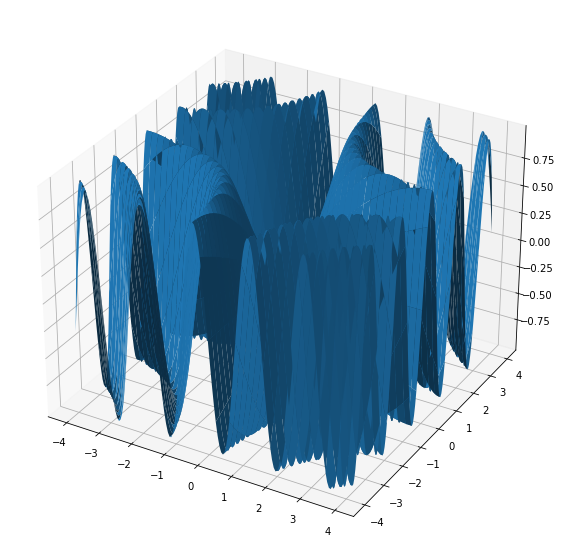

In [8]:
ax = plt.gca(projection='3d')
ax.plot_surface(xvalues, yvalues, zvalues)

## Gradient field

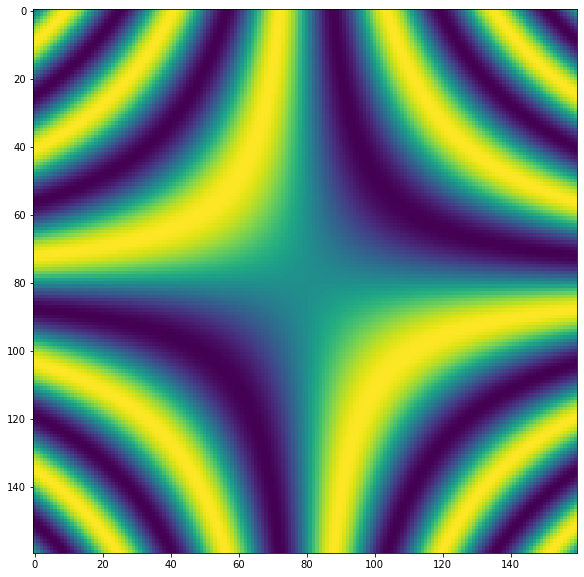

In [10]:
plt.imshow(zvalues)

## Laplacian

Example 13.33 in book

In [13]:
def del2(M):
  dx = 1
  dy = 1
  rows, cols = M.shape
  dx = dx * np.ones ((1, cols - 1))
  dy = dy * np.ones ((rows-1, 1))

  mr, mc = M.shape
  D = np.zeros ((mr, mc))

  if (mr >= 3):
      ## x direction
      ## left and right boundary
      D[:, 0] = (M[:, 0] - 2 * M[:, 1] + M[:, 2]) / (dx[:,0] * dx[:,1])
      D[:, mc-1] = (M[:, mc - 3] - 2 * M[:, mc - 2] + M[:, mc-1]) \
          / (dx[:,mc - 3] * dx[:,mc - 2])
   
      ## interior points
      tmp1 = D[:, 1:mc - 1]
      tmp2 = (M[:, 2:mc] - 2 * M[:, 1:mc - 1] + M[:, 0:mc - 2])
      tmp3 = np.kron (dx[:,0:mc -2] * dx[:,1:mc - 1], np.ones ((mr, 1)))
      D[:, 1:mc - 1] = tmp1 + tmp2 / tmp3

  if (mr >= 3):
      ## y direction
      ## top and bottom boundary
      D[0, :] = D[0,:]  + \
          (M[0, :] - 2 * M[1, :] + M[2, :] ) / (dy[0,:] * dy[1,:])
   
      D[mr-1, :] = D[mr-1, :] \
          + (M[mr-3,:] - 2 * M[mr-2, :] + M[mr-1, :]) \
          / (dy[mr-3,:] * dx[:,mr-2])
   
      ## interior points
      tmp1 = D[1:mr-1, :]
      tmp2 = (M[2:mr, :] - 2 * M[1:mr - 1, :] + M[0:mr-2, :])
      tmp3 = np.kron (dy[0:mr-2,:] * dy[1:mr-1,:], np.ones ((1, mc)))
      D[1:mr-1, :] = tmp1 + tmp2 / tmp3
   
  return D / 4

In [14]:
del2(zvalues)

array([[ 0.00183202, -0.00010718, -0.00390116, ...,  0.00745258,
         0.00390116,  0.00209714],
       [-0.00010718, -0.00204639, -0.00572714, ...,  0.00909541,
         0.00572714,  0.00392313],
       [-0.00390116, -0.00572714, -0.00905234, ...,  0.01195338,
         0.00905234,  0.0074261 ],
       ...,
       [ 0.00745258,  0.00909541,  0.01195338, ..., -0.01430039,
        -0.01195338, -0.01056374],
       [ 0.00390116,  0.00572714,  0.00905234, ..., -0.01195338,
        -0.00905234, -0.0074261 ],
       [ 0.00209714,  0.00392313,  0.0074261 , ..., -0.01056374,
        -0.0074261 , -0.00579986]])

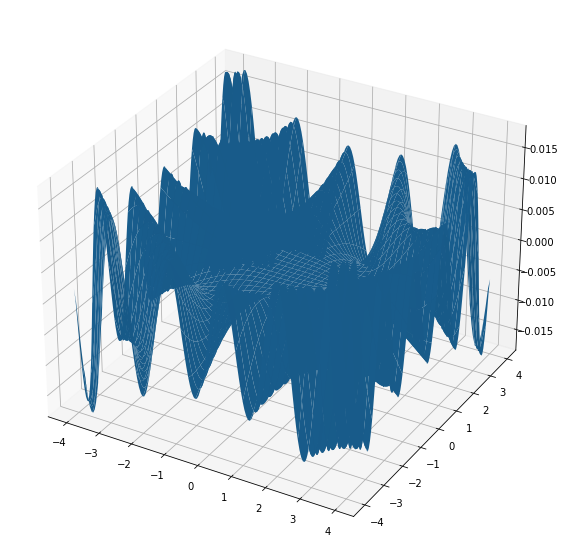

In [19]:
ax = plt.gca(projection='3d')
ax.plot_surface(xvalues, yvalues, del2(zvalues))

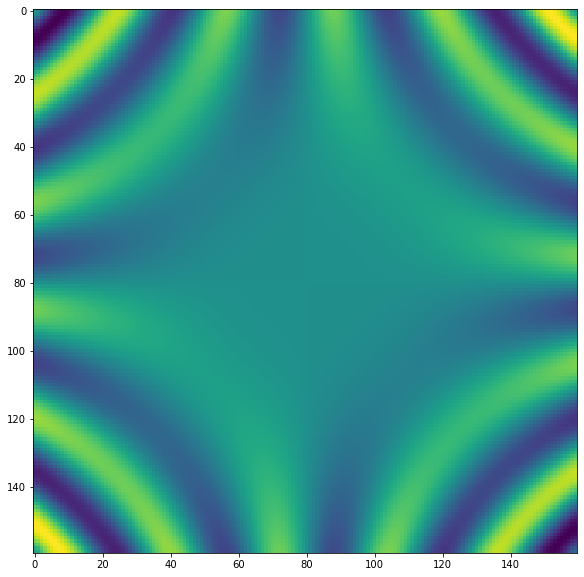

In [16]:
plt.imshow(del2(zvalues))